In [72]:
# importing required library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3


In [41]:
# define connection and cursor

connection =  sqlite3.connect("database.sqlite")

cursor = connection.cursor()

In [42]:
# reading tables from database

tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table'; """, connection)


# Check if tables were read successfully

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [43]:
# selecting specific table

player_attributes = pd.read_sql_query("""SELECT * FROM Player Name JOIN Player_Attributes A1 ON A1.player_api_id = Name.player_api_id""", connection)

player_attributes.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [44]:
type(player_attributes)

pandas.core.frame.DataFrame

In [45]:
player_attributes.shape

(183978, 49)

In [46]:
# iterating the columns
for col in player_attributes.columns:
    print(col)

id
player_api_id
player_name
player_fifa_api_id
birthday
height
weight
id
player_fifa_api_id
player_api_id
date
overall_rating
potential
preferred_foot
attacking_work_rate
defensive_work_rate
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [47]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   player_name          183978 non-null  object 
 3   player_fifa_api_id   183978 non-null  int64  
 4   birthday             183978 non-null  object 
 5   height               183978 non-null  float64
 6   weight               183978 non-null  int64  
 7   id                   183978 non-null  int64  
 8   player_fifa_api_id   183978 non-null  int64  
 9   player_api_id        183978 non-null  int64  
 10  date                 183978 non-null  object 
 11  overall_rating       183142 non-null  float64
 12  potential            183142 non-null  float64
 13  preferred_foot       183142 non-null  object 
 14  attacking_work_rate  180748 non-null  object 
 15  defensive_work_ra

In [48]:
player_attributes.isnull().sum()

id                        0
player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots          

In [49]:
# player_attributes = player_attributes.dropna()

In [50]:
# player_attributes.isnull().sum()

In [51]:
player_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,183978.0,5520.197785,3191.425870,1.00,2754.00,5532.00,8256.00,11075.00
player_api_id,183978.0,135900.617324,136927.840510,2625.00,34763.00,77741.00,191080.00,750584.00
player_fifa_api_id,183978.0,165636.285936,53856.899802,2.00,155681.00,183471.00,199843.75,234141.00
height,183978.0,181.878872,6.394818,157.48,177.80,182.88,185.42,208.28
weight,183978.0,168.776245,15.088920,117.00,159.00,168.00,179.00,243.00
id,183978.0,91989.500000,53110.018250,1.00,45995.25,91989.50,137983.75,183978.00
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.00,155798.00,183488.00,199848.00,234141.00
player_api_id,183978.0,135900.617324,136927.840510,2625.00,34763.00,77741.00,191080.00,750584.00
overall_rating,183142.0,68.600015,7.041139,33.00,64.00,69.00,73.00,94.00
potential,183142.0,73.460353,6.592271,39.00,69.00,74.00,78.00,97.00


In [86]:
gk_attrs = ['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']

In [52]:
player_attributes = player_attributes.drop(['id', 'player_fifa_api_id', 'player_api_id','birthday'], axis=1)

In [53]:
player_attributes.head()

,player_name,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [54]:
max_dates = player_attributes.groupby('player_name')['date'].max()

In [55]:
max_dates

player_name
Aaron Appindangoye             2016-02-18 00:00:00
Aaron Cresswell                2016-04-21 00:00:00
Aaron Doran                    2016-01-07 00:00:00
Aaron Galindo                  2016-04-21 00:00:00
Aaron Hughes                   2015-12-24 00:00:00
                                      ...         
Zsolt Low                      2011-02-22 00:00:00
Zurab Khizanishvili            2011-02-22 00:00:00
Zvjezdan Misimovic             2012-08-31 00:00:00
de Oliveira Cleber Monteiro    2012-02-22 00:00:00
dos Santos Fabio Junior        2011-02-22 00:00:00
Name: date, Length: 10848, dtype: object

In [56]:
len(player_attributes)

183978

In [57]:
player_attributes.isnull().sum()/player_attributes.shape[0]*100

player_name            0.000000
height                 0.000000
weight                 0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

Text(0.5, 1.0, 'Missing Values in %')

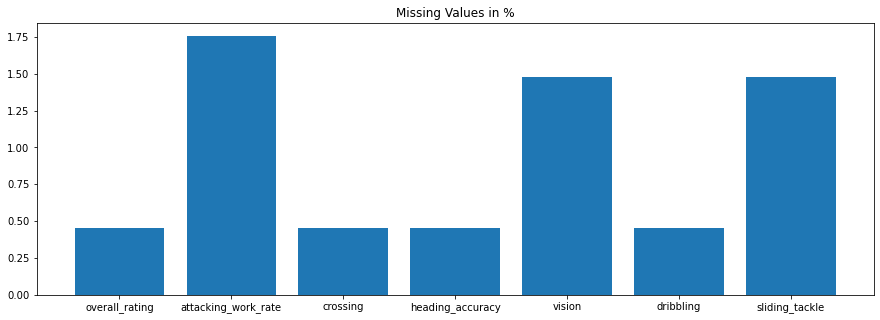

In [58]:
df1 = player_attributes[['overall_rating','attacking_work_rate','crossing','heading_accuracy','vision','dribbling','sliding_tackle']].isnull().sum().T/player_attributes.shape[0]*100
plt.figure(figsize=(15,5))
plt.bar(df1.index, df1)
plt.title('Missing Values in %')

In [59]:
player_attributes = player_attributes.dropna(axis=0 , subset=['overall_rating'])
player_attributes.shape

(183142, 42)

In [60]:
player_attributes.isnull().sum()[player_attributes.isnull().sum()>0]

attacking_work_rate    2394
volleys                1877
curve                  1877
agility                1877
balance                1877
jumping                1877
vision                 1877
sliding_tackle         1877
dtype: int64

In [61]:
player_attributes = player_attributes.dropna(axis=0, subset=['volleys'])

In [62]:
player_attributes.shape

(181265, 42)

In [63]:
player_attributes.isnull().sum()[player_attributes.isnull().sum()>0]

attacking_work_rate    911
dtype: int64

In [64]:
player_attributes['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [66]:
player_attributes['attacking_work_rate'].mode()[0]

'medium'

In [67]:
player_attributes.loc[player_attributes['attacking_work_rate'].isnull() , 'attacking_work_rate' ] = player_attributes['attacking_work_rate'].mode()[0]

In [68]:
player_attributes['attacking_work_rate'].value_counts()

medium    125981
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [70]:
player_attributes['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [71]:
pd.crosstab(player_attributes['attacking_work_rate'], player_attributes['defensive_work_rate'])

defensive_work_rate,0,1,2,3,4,5,6,7,8,9,_0,ean,es,high,low,medium,o,ormal,tocky
attacking_work_rate,,,,,,,,,,,,,,,,,,,
None,168,377,245,220,89,203,145,193,65,126,0,0,0,69,7,82,1328,0,0
high,11,9,13,0,0,17,13,5,0,4,0,0,0,7939,5727,29085,0,0,0
le,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0,0,0,0,0
low,0,0,0,12,18,0,0,0,0,0,0,0,0,3319,695,4525,0,0,0
medium,9,35,76,11,9,11,21,9,5,13,911,0,0,15714,12003,97154,0,0,0
norm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,317,0
stoc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86
y,0,0,0,0,0,0,0,0,0,0,0,0,94,0,0,0,0,0,0


In [92]:
ngk_player_attributes = player_attributes.drop(gk_attrs,axis=1)

<AxesSubplot:>

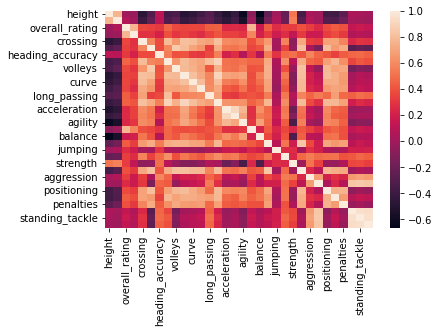

In [93]:
sns.heatmap(ngk_player_attributes.corr())

In [82]:
player_attributes[player_attributes['gk_diving']>50]['gk_diving'].count()

14556

***we have droped four attributes which are not neccessery for our regression model, the four attributes are 'id', 'player_fifa_api_id', 'player_api_id', 'date'***